In [45]:
from ObjectDetector import ObjectDetector
from Visualizer import Visualizer
from VideoLoader import VideoLoader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import torch
import numpy as np
from Deepsort import Tracker

In [86]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 200

# Demonstrating usage of video loader and human detector

In [47]:
loader = VideoLoader()
video,fps = loader.load_video_for_detection('/cs/labs/buxi/aarono/ava_kinetics/theatre.avi')

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


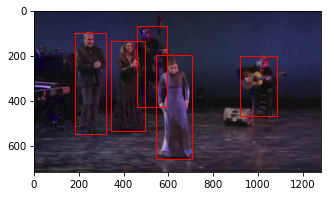

In [48]:
det = ObjectDetector()
inp_img = video[:,0,:,:].permute(1,2,0)
det.plot_bboxes(inp_img)
predicted_boxes = det.get_person_bboxes(video[:,0,:,:].permute(1,2,0))

In [49]:
from ModelInference import ModelInference
m = ModelInference(batch_size=5,n_frames_skip=6,reset_buffer_every_n_batches=20)

In [50]:
out = loader.pad_video(video,predicted_boxes[1].long())

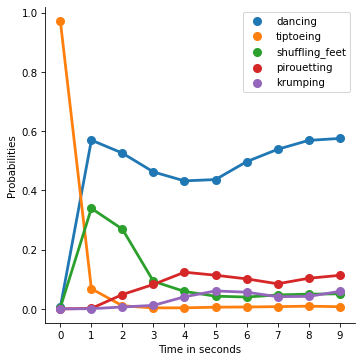

In [51]:
df = m.analyse_vid(out, 30, return_df=True, show_plot=True)

In [52]:
from Visualizer import Visualizer
viz = Visualizer(initialized_model=m,
                initialized_detector=det,
                initialized_loader=loader)



In [7]:
def run_pipeline(video_path,out_fname):
    video,fps = loader.load_video_for_detection(video_path)
    L = viz.get_predictions_every_n_seconds(video, int(fps), n_seconds=1)
    plt.imshow(L[0])
    
    out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), int(fps), (L[0].shape[1], L[0].shape[0]))
    for frame in L:
        out.write(frame[:,:,::-1])

    out.release()
    return L
    

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]
/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


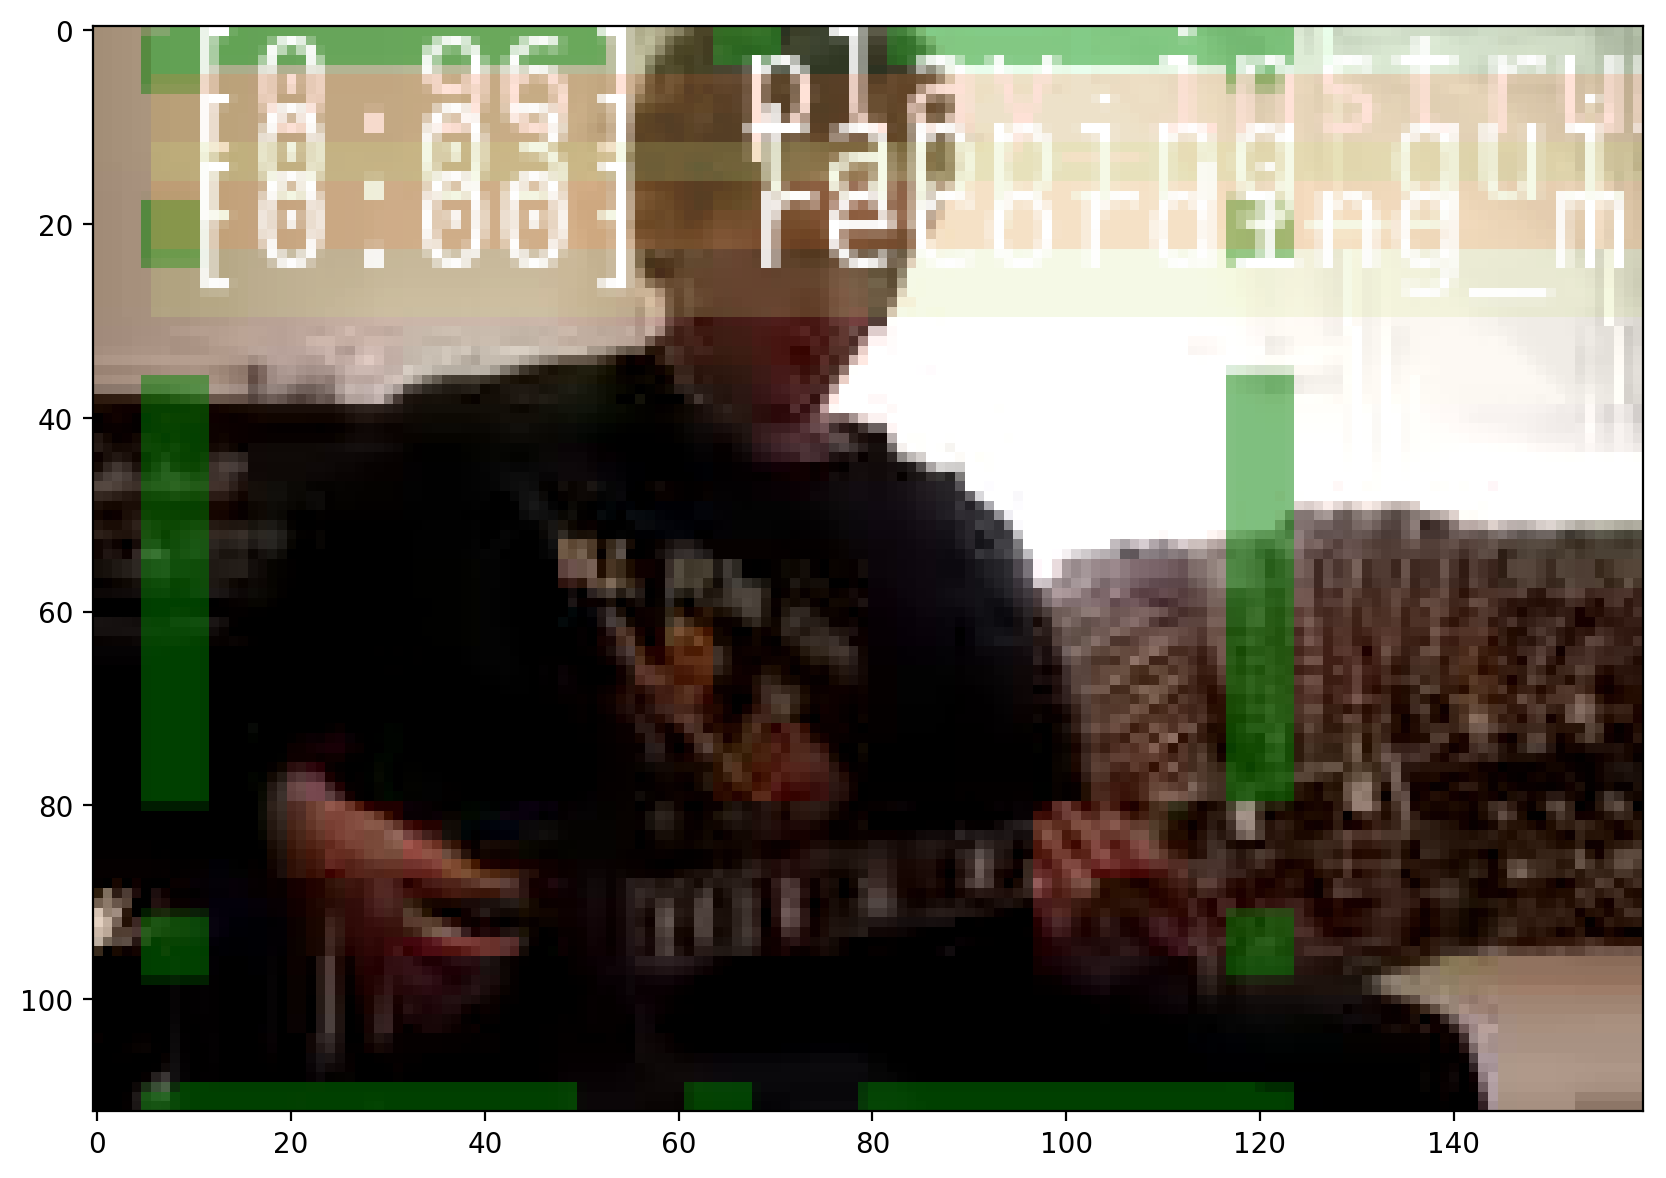

In [10]:
L = run_pipeline('/cs/labs/buxi/aarono/datasets/k400_val/playing guitar/-PbHg505GzE_000000_000010.mp4','/cs/labs/buxi/aarono/ava_kinetics/separate_classes/-PbHg505GzE_000000_000010.avi')

In [ ]:
L = run_pipeline('/cs/labs/buxi/aarono/datasets/k400_val/playing guitar/-PbHg505GzE_000000_000010.mp4','/cs/labs/buxi/aarono/ava_kinetics/separate_classes/-PbHg505GzE_000000_000010.avi')

In [5]:
tracker = Tracker('annotated_vid.txt')

In [6]:
df = tracker.df

In [8]:
vid = np.array(video.permute(1,2,3,0))

In [70]:
df1 = tracker.impute_bboxes(tracker.df,person_id=1)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [93]:
df1

,frame_number,person_id,x0,y0,width,height,rolling_x0,rolling_y0,rolling_width,rolling_height,is_imputed
0,0,1,568,193,150,489,568,193,150,489,1
1,1,1,568,193,150,489,568,193,150,489,1
2,2,1,568,193,150,489,568,193,150,489,1
3,3,1,568,193,150,489,568,193,150,489,0
4,4,1,569,193,152,485,568,193,151,487,0
...,...,...,...,...,...,...,...,...,...,...,...
296,296,1,579,158,152,517,524,153,173,512,0
297,297,1,582,157,155,524,527,154,173,512,0
298,298,1,585,157,153,527,530,154,172,513,0
299,299,1,586,158,154,527,532,155,172,513,0


In [24]:
L = tracker.create_person_subclip(vid,df1.loc[0:299],aspect_ratio_max=0.5)

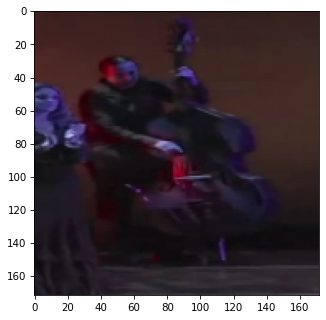

In [39]:
plt.imshow(L[200])

In [37]:
input = torch.Tensor(np.array(L[0:299])).permute(3, 0, 1, 2)

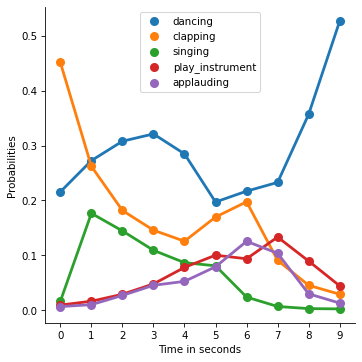

In [38]:
m = ModelInference(batch_size=5,n_frames_skip=6,reset_buffer_every_n_batches=20)
df = m.analyse_vid(input, 30, return_df=True, show_plot=True)

In [60]:
df

,index,cols,Probabilities
0,0,dancing,0.005718
1,1,dancing,0.569877
2,2,dancing,0.525940
3,3,dancing,0.462383
4,4,dancing,0.432273
5,5,dancing,0.436751
6,6,dancing,0.497079
7,7,dancing,0.538771
8,8,dancing,0.569061
9,9,dancing,0.575503


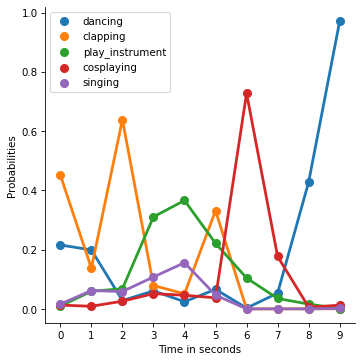

In [32]:
m = ModelInference(batch_size=5,n_frames_skip=6,reset_buffer_every_n_batches=1)
df = m.analyse_vid(input, 30, return_df=True, show_plot=True)

In [ ]:
def run_pipeline(video_path,out_fname):
    video,fps = loader.load_video_for_detection(video_path)
    L = viz.get_predictions_every_n_seconds(video, int(fps), n_seconds=1)
    plt.imshow(L[0])
    
    out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), int(fps), (L[0].shape[1], L[0].shape[0]))
    for frame in L:
        out.write(frame[:,:,::-1])

    out.release()
    return L

In [ ]:
visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),torch.Tensor(np.array(predictions)), predicted_boxes.long(),text_alpha = 0.2)

In [41]:
from visualization import VideoVisualizer


In [ ]:
L = []
n_seconds = 1
fps = 30
for i in range(0,video.shape[1],int(n_seconds*fps)):
    subvid = video[:,i:i+fps,:,:]
    predictions = []
    if len(predicted_boxes)<1:
        predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
    for bbox in predicted_boxes:
        out = self.initialized_loader.pad_video(subvid,bbox.long())
        predictions.append(self.initialized_model.get_preds(out, 30))
    
    for frame in range(subvid.shape[1]):
        out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
        torch.Tensor(np.array(predictions)), 
        predicted_boxes.long(),text_alpha = 0.2)
        L.append(out_img_pred)

In [68]:
predicted_boxes

tensor([[ 10.,  10., 100., 100.]])

In [71]:
df1

,frame_number,person_id,x0,y0,width,height,rolling_x0,rolling_y0,rolling_width,rolling_height,is_imputed
0,0,1,568,193,150,489,568,193,150,489,1
1,1,1,568,193,150,489,568,193,150,489,1
2,2,1,568,193,150,489,568,193,150,489,1
3,3,1,568,193,150,489,568,193,150,489,0
4,4,1,569,193,152,485,568,193,151,487,0
...,...,...,...,...,...,...,...,...,...,...,...
296,296,1,579,158,152,517,524,153,173,512,0
297,297,1,582,157,155,524,527,154,173,512,0
298,298,1,585,157,153,527,530,154,172,513,0
299,299,1,586,158,154,527,532,155,172,513,0


In [73]:
def from_df_to_bbox(df):
    L= []
    for rolling_x0,	rolling_y0,	rolling_width,	rolling_height in df.loc[:,['rolling_x0',	'rolling_y0',	'rolling_width',	'rolling_height']].values:
        L.append([rolling_x0,rolling_y0,rolling_x0+rolling_width,rolling_y0+rolling_height])
    return L
    

In [74]:
bboxes = from_df_to_bbox(df1)

In [75]:
bboxes

[[568, 193, 718, 682],
 [568, 193, 718, 682],
 [568, 193, 718, 682],
 [568, 193, 718, 682],
 [568, 193, 719, 680],
 [569, 192, 720, 678],
 [569, 193, 721, 678],
 [569, 194, 722, 678],
 [570, 194, 724, 678],
 [569, 195, 725, 678],
 [569, 196, 726, 679],
 [569, 197, 728, 678],
 [569, 199, 729, 677],
 [570, 202, 730, 676],
 [572, 204, 732, 675],
 [574, 205, 733, 671],
 [575, 206, 733, 669],
 [577, 207, 735, 667],
 [578, 209, 735, 667],
 [579, 210, 736, 666],
 [580, 211, 737, 666],
 [580, 211, 738, 665],
 [581, 211, 738, 664],
 [581, 212, 739, 665],
 [582, 212, 740, 665],
 [582, 212, 740, 664],
 [583, 212, 741, 663],
 [583, 213, 741, 663],
 [584, 213, 742, 663],
 [585, 213, 743, 662],
 [585, 213, 743, 662],
 [585, 213, 744, 662],
 [586, 212, 745, 662],
 [586, 213, 746, 661],
 [587, 213, 748, 660],
 [588, 213, 750, 659],
 [589, 214, 751, 659],
 [590, 214, 752, 658],
 [592, 215, 754, 658],
 [593, 216, 755, 659],
 [595, 216, 757, 657],
 [596, 217, 759, 657],
 [596, 217, 760, 656],
 [596, 217,

In [91]:
len(L)

300

In [90]:
L = []
n_seconds = 1
fps = 30
for i in range(0,video.shape[1]):
    out_img_pred = viz.visualizer.draw_one_frame(np.array(video[:,i,:,:].permute(1,2,0)).astype(int),
    torch.Tensor(np.array(df)), 
    torch.Tensor(([bboxes[i]])).long(),text_alpha = 0.2)
    L.append(out_img_pred)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


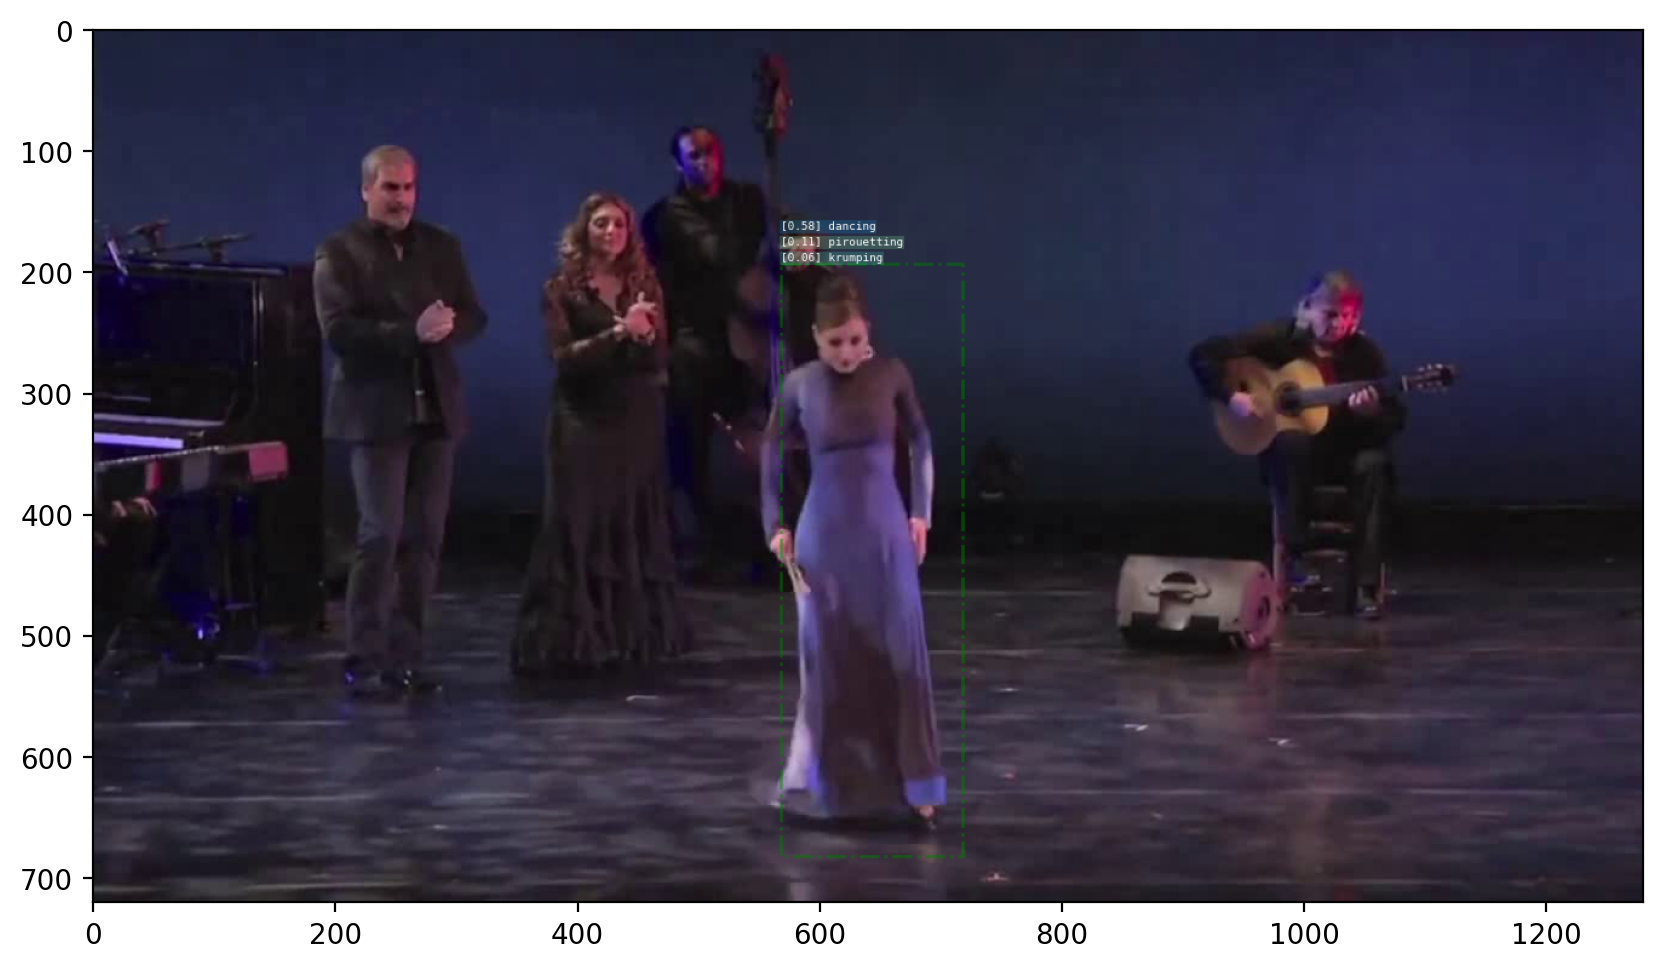

In [87]:
plt.imshow(L[0])

In [92]:
out_fname = 'improved_tracking_imputation.avi'
out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), 30, (1280, 720))
n_frame = 0
plt.ioff()

for frame in L:
    out.write(frame)
    # finally:
    #     out.release()

out.release()

In [80]:
L = []
n_seconds = 1
fps = 30
predicted_boxes = torch.Tensor([[10,10,100,100]])
for i in range(0,video.shape[1],int(n_seconds*fps)):
    subvid = video[:,i:i+fps,:,:]
    
    for frame in range(subvid.shape[1]):
        out_img_pred = viz.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
        torch.Tensor(np.array(df)), 
        predicted_boxes.long(),text_alpha = 0.2)
        L.append(out_img_pred)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [83]:
torch.Tensor(([bboxes[i]])).long()

tensor([[503, 144, 660, 636]])

In [81]:
predicted_boxes

tensor([[ 10.,  10., 100., 100.]])

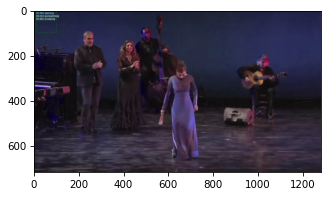

In [67]:
plt.imshow(L[10])

In [ ]:
def get_predictions_every_n_seconds(video, fps, n_seconds=1):
    L = []
    for i in range(0,video.shape[1],int(n_seconds*fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = self.initialized_detector.get_person_bboxes(subvid[:,int(subvid.shape[1]/2),:,:].permute(1,2,0))
        predictions = []
        if len(predicted_boxes)<1:
            predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
        for bbox in predicted_boxes:
            out = self.initialized_loader.pad_video(subvid,bbox.long())
            predictions.append(self.initialized_model.get_preds(out, 30))
        
        for frame in range(subvid.shape[1]):
            out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L

In [43]:
visualizer

NameError: name 'visualizer' is not defined

In [59]:
video.max()

tensor(255.)

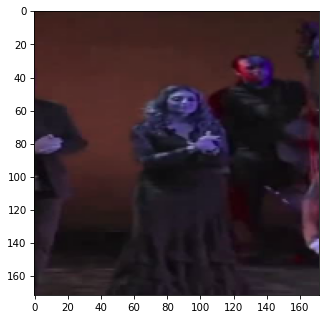

In [56]:
plt.imshow(L[0])

In [58]:
video.shape

torch.Size([3, 300, 720, 1280])

In [55]:
viz.visualizer.draw_one_frame(np.array(video[:,frame,:,:].permute(1,2,0).astype(int),)

<bound method VideoVisualizer.draw_one_frame of <visualization.VideoVisualizer object at 0x7fcd9f92b748>>

In [54]:
viz.visualizer.draw_one_frame(, preds,   bboxes, alpha = 0.5)

NameError: name 'frame' is not defined

In [ ]:
def get_predictions_every_n_seconds(self,video, fps, n_seconds=1):
    L = []
    for i in range(0,video.shape[1],int(n_seconds*fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = self.initialized_detector.get_person_bboxes(subvid[:,int(subvid.shape[1]/2),:,:].permute(1,2,0))
        predictions = []
        if len(predicted_boxes)<1:
            predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
        for bbox in predicted_boxes:
            out = self.initialized_loader.pad_video(subvid,bbox.long())
            predictions.append(self.initialized_model.get_preds(out, 30))
        
        for frame in range(subvid.shape[1]):
            out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L

In [ ]:
L[0].shape

(172, 172, 3)

In [25]:
L[0].shape

torch.Size([300, 172, 172])

In [15]:
video

tensor([[[[31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          ...,
          [26., 26., 28.,  ..., 31., 31., 31.],
          [25., 25., 27.,  ..., 31., 31., 31.],
          [23., 23., 25.,  ..., 31., 31., 31.]],

         [[31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          ...,
          [26., 26., 28.,  ..., 31., 31., 31.],
          [25., 25., 27.,  ..., 31., 31., 31.],
          [23., 23., 25.,  ..., 31., 31., 31.]],

         [[31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          [31., 31., 31.,  ..., 38., 38., 38.],
          ...,
          [26., 26., 28.,  ..., 31., 31., 31.],
          [25., 25., 27.,  ..., 31., 31., 31.],
          [23., 23., 25.,  ..., 31., 31., 31.]],

         ...,

         [[33., 33., 33.,  ..., 33., 33., 33.],
          [33., 33., 3

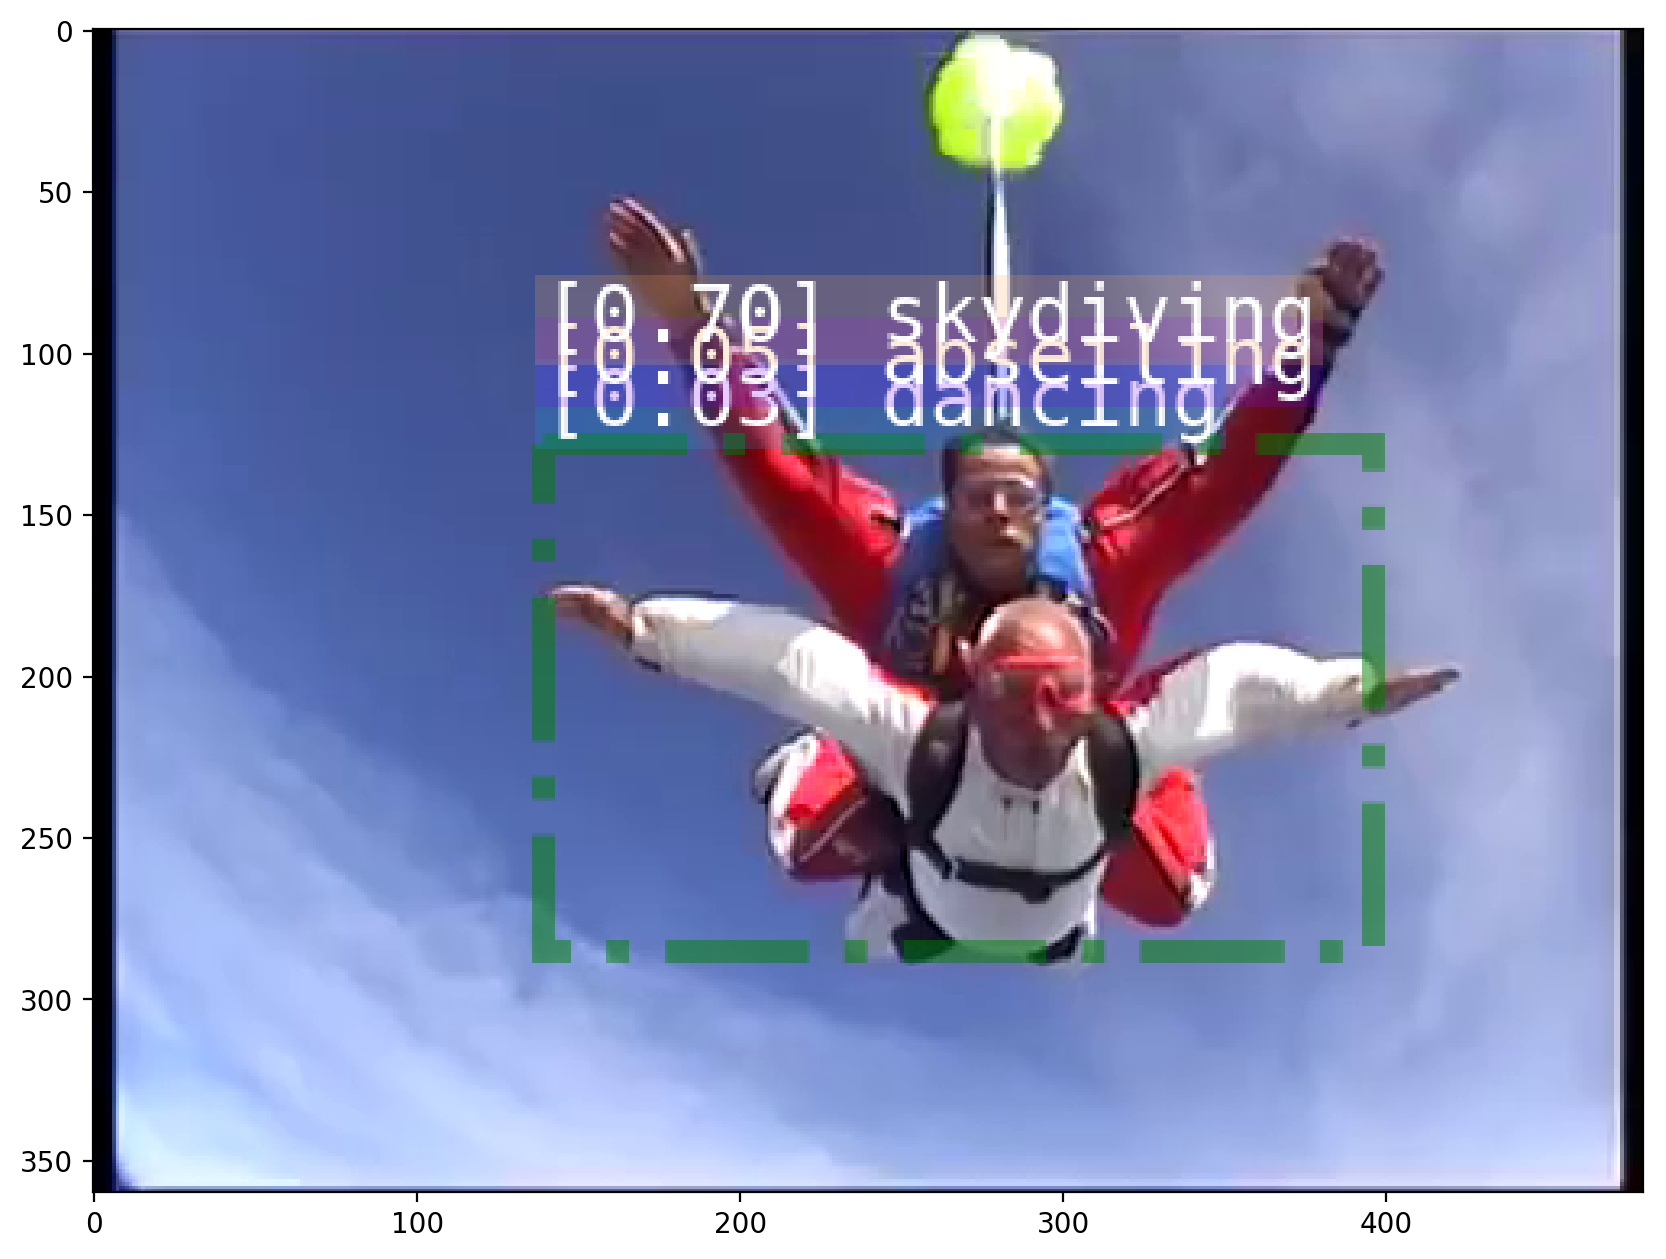

In [38]:
plt.imshow(L[2])

In [39]:
def show_big_crop(pred_box,big=True):
    if big:
        big_box = pred_box - torch.Tensor([100,100,-100,-100])
    else:
        big_box = pred_box
    out = loader.pad_video(video,big_box.long())
    plt.imshow(out[:,0,:,:].permute(1,2,0))
    return out

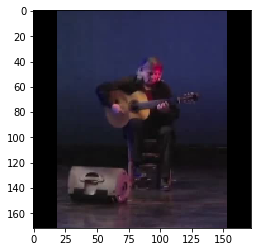

In [34]:
out = show_big_crop(predicted_boxes[3].long())

In [37]:
out.shape

torch.Size([3, 300, 172, 172])

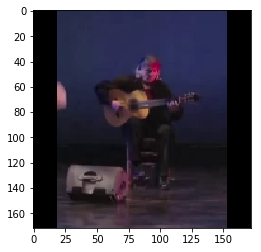

In [38]:
plt.imshow(out[:,50,:,:].permute(1,2,0))

In [16]:
out = loader.pad_video(video,big_box.long())

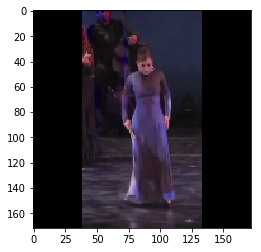

In [33]:
plt.imshow(out[:,0,:,:].permute(1,2,0))

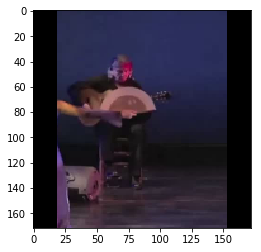

In [48]:
plt.imshow(out[:,180,:,:].permute(1,2,0))

In [5]:
from ModelInference import ModelInference

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [61]:
import pandas as pd

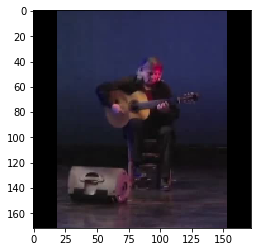

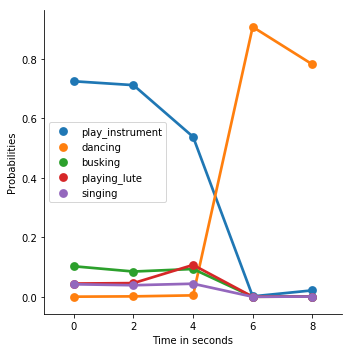

In [65]:
out = show_big_crop(predicted_boxes[3].long(),True)
df = m.analyse_vid(out, 30, return_df=True, show_plot=True)

In [ ]:
plt.imshow(out[])

In [62]:
df

array([1.63395584e-04, 2.42061191e-03, 1.11989080e-04, 4.06194267e-05,
       4.34596222e-05, 4.91168721e-05, 2.16934946e-04, 8.03278090e-05,
       2.87221810e-05, 1.90577237e-04, 5.79069711e-05, 1.26327650e-04,
       3.79880548e-05, 1.96321591e-04, 1.52541485e-04, 2.52378250e-05,
       1.60682213e-03, 2.97813735e-04, 3.91944515e-04, 2.80566601e-04,
       3.55008640e-04, 9.98809548e-04, 1.72401400e-04, 7.79998882e-05,
       2.34606105e-05, 1.44489226e-04, 1.02029953e-04, 7.79771726e-05,
       8.97756981e-05, 7.33492780e-05, 3.51968949e-04, 1.10638452e-04,
       1.32856146e-03, 6.22598091e-05, 2.24194431e-04, 3.00690263e-05,
       8.18992485e-05, 1.84660428e-04, 1.21400153e-04, 4.26129845e-05,
       3.20788444e-04, 8.78132589e-04, 2.17555877e-04, 2.73116515e-04,
       2.45556264e-04, 7.80659757e-05, 2.95828140e-05, 8.68552816e-05,
       6.48650675e-05, 3.51553281e-05, 3.48002097e-04, 1.63686913e-04,
       9.51649272e-05, 2.62209942e-04, 4.83246840e-04, 2.12196624e-04,
      

In [61]:
df = m.get_preds(out, 30)

In [66]:
from visualization import VideoVisualizer

visualizer = VideoVisualizer(600, m.class_id_dict, top_k=2, mode="top-k")

In [67]:

out_img_pred = visualizer.draw_one_frame(np.array(video[:,0,:,:].permute(1,2,0)).astype(int), torch.Tensor(m.get_preds(out, 30)), [predicted_boxes[1].long()])

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [21]:
torch.Tensor(m.get_preds(out, 30)).shape

torch.Size([513])

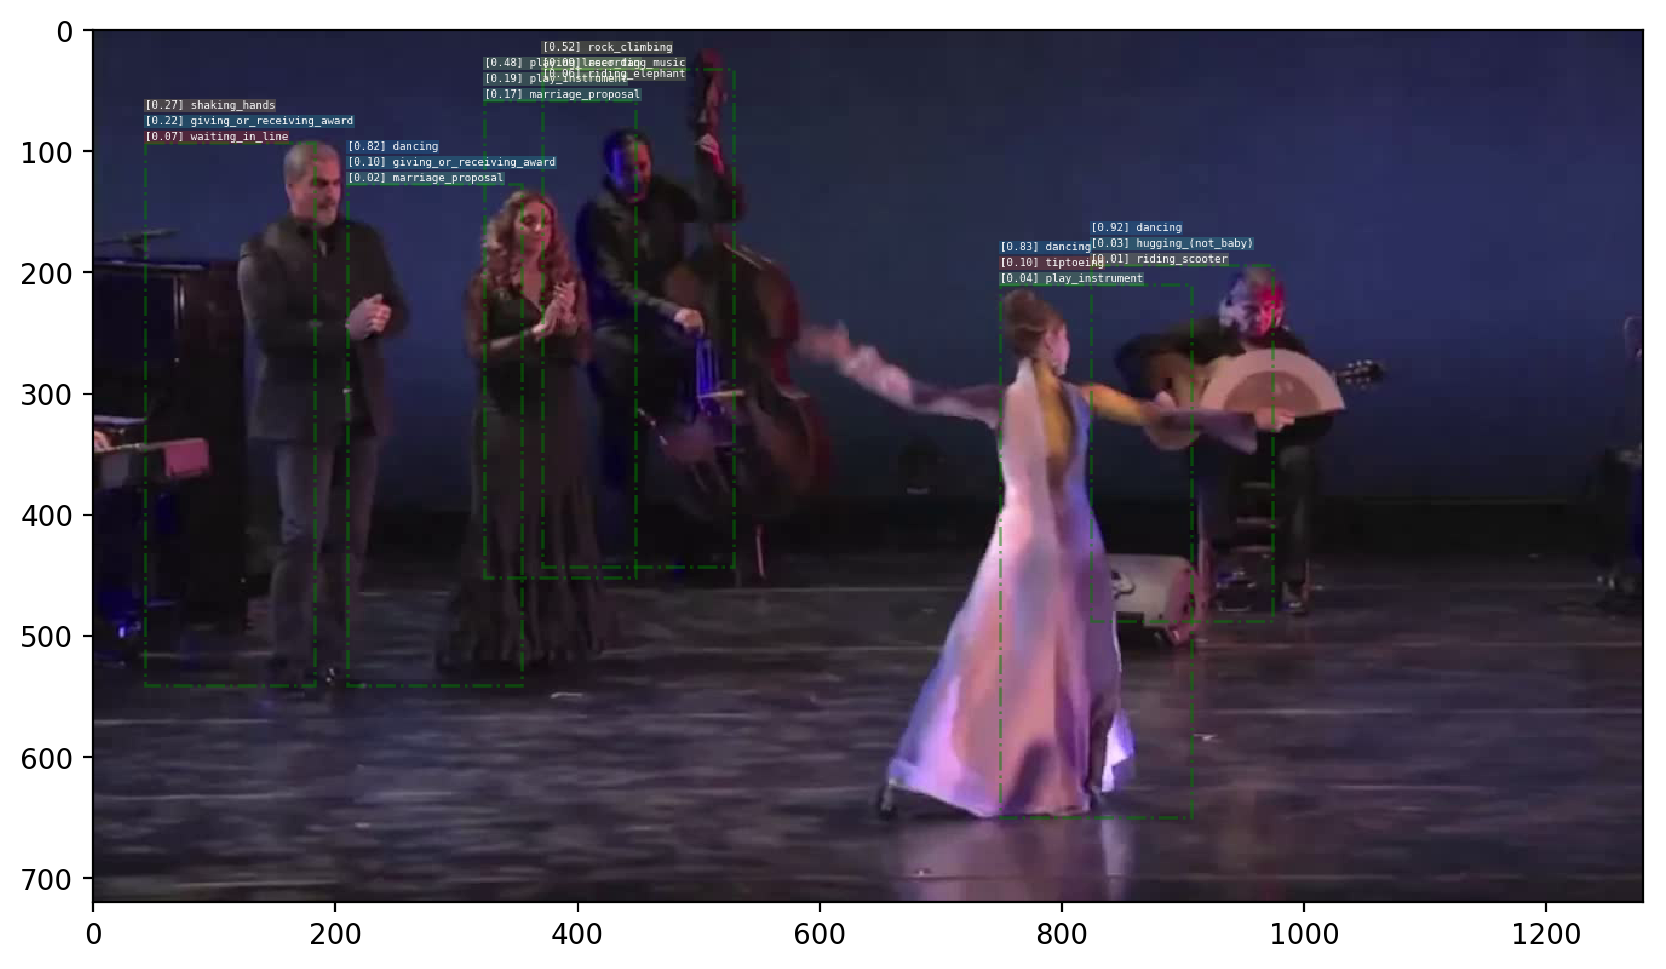

In [75]:
plt.imshow(L[180])

In [335]:
for i in range(0,video.shape[1],int(fps)):
    print(i)

0
30
60
90
120
150
180
210
240
270


In [365]:
def get_predictions(video, fps):
    L = []
    for i in range(0,video.shape[1],int(fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))
        predictions = []
        for bbox in predicted_boxes:
            out = loader.pad_video(subvid,bbox.long())
            predictions.append(m.get_preds(out, 30))
        
        for frame in range(fps):
            out_img_pred = visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L
    #return torch.Tensor(np.array(predictions))


In [25]:
video.shape

torch.Size([3, 300, 720, 1280])

In [68]:
from Visualizer import Visualizer

In [69]:
from Visualizer import Visualizer
viz = Visualizer(initialized_model=m,
                initialized_detector=det,
                initialized_loader=loader)



In [70]:
L = viz.get_predictions_every_n_seconds( video, 30, n_seconds=1)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]
/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [314]:
i=0
fps=30
subvid = video[:,i*int(fps):(i+1)*int(fps),:,:]


In [329]:
video.shape

torch.Size([3, 300, 720, 1280])

In [366]:
L = get_predictions(video, fps)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]
/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [10]:
L[0].shape

NameError: name 'L' is not defined

In [367]:
out_fname = 'annotated_vid.avi'
out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), fps, (1280, 720))
n_frame = 0
plt.ioff()

for frame in L:
    out.write(frame)
    # finally:
    #     out.release()

out.release()

In [ ]:

    try:
        while n_frame<10:
            ret, frame = cap.read()
            if not ret:
                break
            frame = frame[y_1:y_1+height,x_1:x_1+width,:]
            frame = resize_with_pad(frame,(172,172)) 
            out.write(frame)
            n_frame +=1  

    finally:
        cap.release()
        out.release()

In [315]:
subvid.shape

torch.Size([3, 30, 720, 1280])

In [316]:
predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))


/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


In [47]:
i=0

In [48]:
subvid = video[:,i*int(fps):(i+1)*int(fps),:,:]
predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))
predictions = []
for bbox in predicted_boxes:
    out = loader.pad_video(subvid,bbox.long())
    predictions.append(m.get_preds(out, 30))

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


In [49]:
subvid.shape[1]/2

torch.Size([3, 29, 720, 1280])

In [318]:
predictions = []
for bbox in predicted_boxes:
    out = loader.pad_video(subvid,bbox.long())
    predictions.append(m.get_preds(out, 30))

In [304]:
fps

29.97002997002997

In [306]:
L = get_predictions(video, 30)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


IndexError: index 15 is out of bounds for dimension 1 with size 0

In [292]:

out_img_pred = visualizer.draw_one_frame(np.array(video[:,0,:,:].permute(1,2,0)).astype(int),
 torch.Tensor(np.array(predictions)), 
 predicted_boxes.long(),text_alpha = 0.2)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


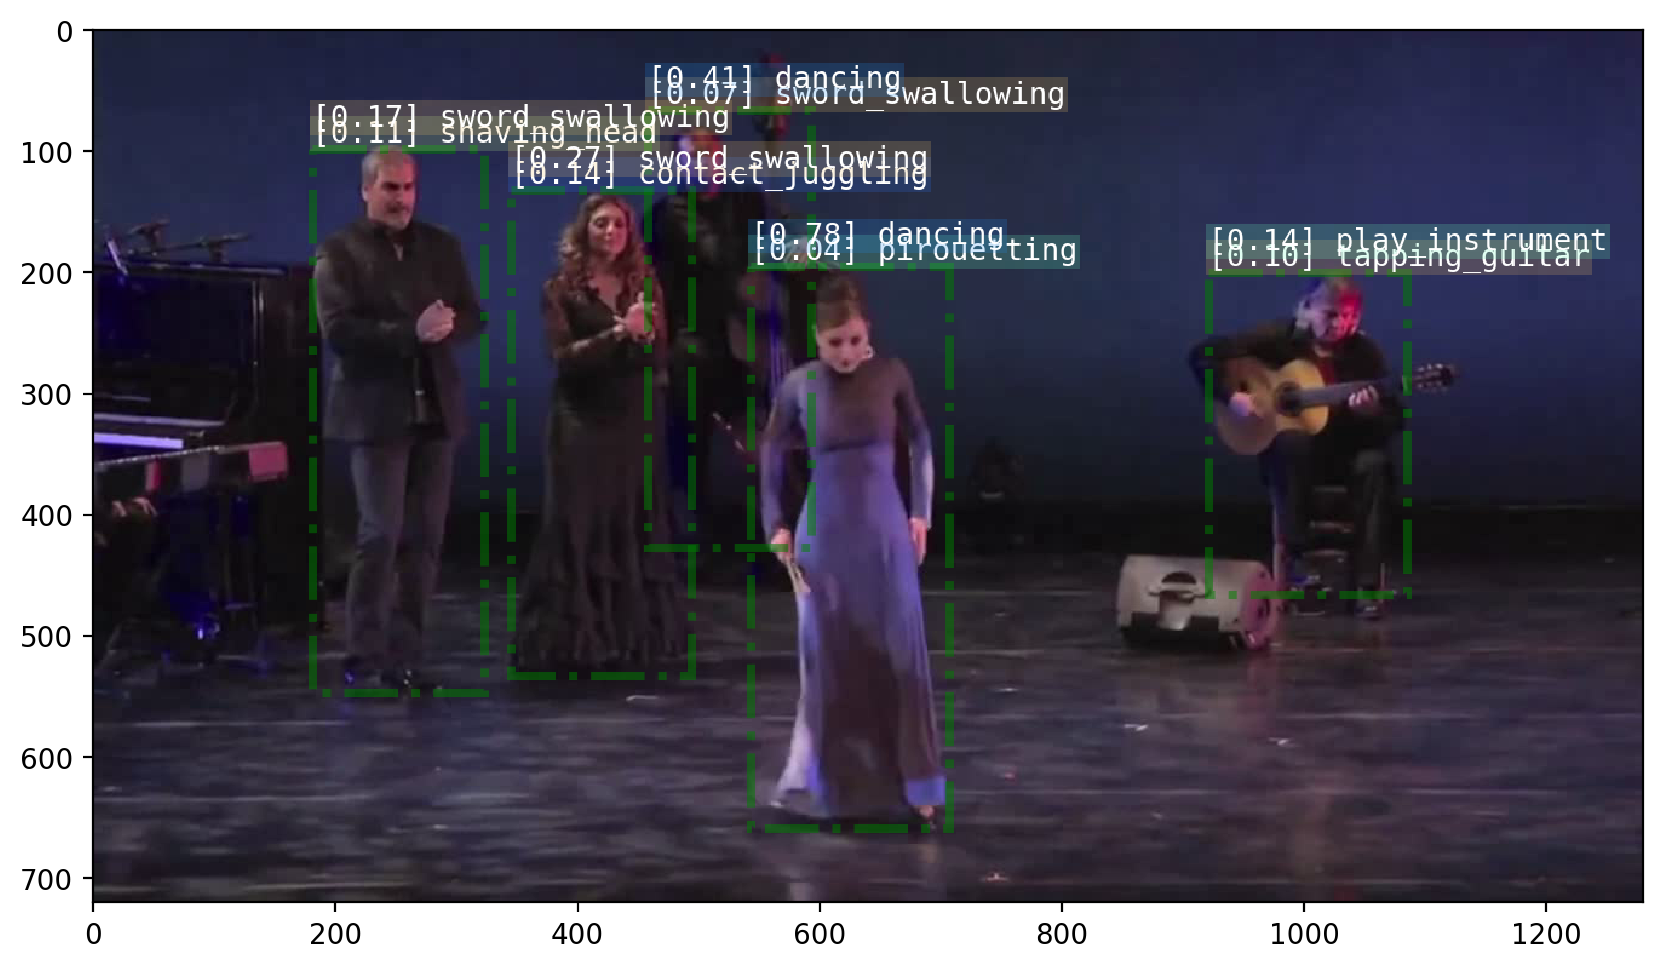

In [294]:
plt.imshow(out_img_pred)

In [35]:
from Visualizer import Visualizer

In [295]:
from visualization import VideoVisualizer

class Visualizer:
    def __init__(self, classes_dict, top_n=3):
        self.classes_dict = classes_dict
        self.top_n = top_n
        self.num_classes = len(classes_dict.keys())
        self.visualizer = VideoVisualizer(self.num_classes, self.classes_dict, top_k=3, mode="top-k")

    def foo(self, frame_list, preds_list, bbox_list):
        out_img_pred = self.visualizer.draw_one_frame(frame_list[0], preds_list, bbox_list)